## WORKING WITH KERAS

***Introduction to Keras
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.
The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers, or write models entirely from scratch via subclasssing.***

***Working on the MNIST Dataset
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.***

### IMPORTING LIBRARIES

In [24]:
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train.shape

(60000,)

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
y_test.shape

(10000,)

**Let's visualize the first image in the training set using Matplotlib's scripting layer.**

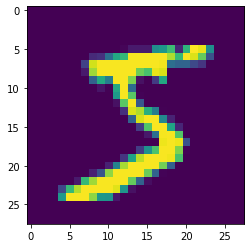

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [30]:
X_train.max()

255

### Preprocesing ###
**With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.**

In [31]:
num_pixels=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixels).astype(float)
X_test=X_test.reshape(X_test.shape[0],num_pixels).astype(float)

In [32]:
X_train=X_train/255
X_test=X_test/255

In [33]:
X_train.shape

(60000, 784)

In [34]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [35]:
y_train.shape

(60000, 10)

In [36]:
num_classes=y_train.shape[1]
num_classes

10

In [37]:
from keras.models import Sequential
from keras.layers import Dense

def classification_model():
    model=Sequential()
    model.add(Dense(num_pixels,activation="relu",input_shape=(num_pixels,)))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(num_classes,activation="softmax"))
    
    model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])
    
    return model


In [38]:
model = classification_model()

model.fit(X_train,y_train , validation_data=(X_test,y_test) , epochs=10, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 12s - loss: 0.1863 - accuracy: 0.9428 - val_loss: 0.0921 - val_accuracy: 0.9719
Epoch 2/10
1875/1875 - 11s - loss: 0.0774 - accuracy: 0.9756 - val_loss: 0.0781 - val_accuracy: 0.9770
Epoch 3/10
1875/1875 - 10s - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0749 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 - 9s - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0796 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 - 10s - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0836 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 - 10s - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0717 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 - 9s - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0717 - val_accuracy: 0.9823
Epoch 8/10
1875/1875 - 9s - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0755 - val_accuracy: 0.9820
Epoch 9/10
1875/1875 - 9s - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0861 - val_accuracy: 0.9819
Epoch 10/10
1875/1875 - 11s - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0

In [39]:
scores

[0.09965968877077103, 0.98089998960495]

**Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.**

In [40]:
model.save("first_classification.h5")

In [41]:
from keras.models import load_model
pretrained_model=load_model("first_classification.h5")

pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


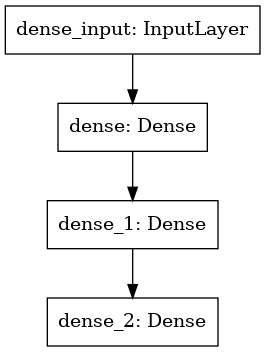

In [42]:
from keras.utils import plot_model
plot_model(pretrained_model,to_file="first_classification.png")